In [16]:
import matplotlib.pyplot as plt

from skimage import data
from skimage.color import rgb2hsv
from imageio import imread 
%matplotlib inline
import imageio
import numpy as np
from skimage import filters

In [6]:
def calcThreshold(imageArray):
    from skimage import filters
    #calculate the histogram - 5 bins
    #lowest value bin is the shadow
    #second lowest is the plant
    #highest two is assumed to be the bright background
    n, bins= np.histogram(imageArray.ravel(), bins=5)
    grad = np.gradient(n)
    lowerThresh = None
    highThresh = None
    
    for i in range(len(grad)):
        if i+1<len(n) and lowerThresh == None:
            if grad[i] >10000 and n[i+1]>10000: # first rise
                #print(bins[i+1], n[i+1])
                lowerThresh = bins[i+1]
                highThresh = filters.threshold_otsu(imageArray)  
            if grad[i] < -5000 and n[i+1]>10000: # first fall (hue issue?)
                lowerThresh = bins[i+1]
                highThresh = filters.threshold_otsu(imageArray)
                if lowerThresh > highThresh:
                    highThresh = bins[i+2]
            medFilterThre2C = None
    if lowerThresh is not None and highThresh is not None:
        #print(lowerThresh, highThresh)

        binary2 = np.where(imageArray > lowerThresh, 255, 0)
        binary3 = np.where(imageArray < highThresh, 255, 0)
        binary4 = binary2&binary3

        from scipy import ndimage as ndi
        #median filter
        medFilterThre2= ndi.median_filter(binary4, size = 3)
        #reduce small pixel blocks
        label_objects, nb_labels = ndi.label(medFilterThre2)
        sizes = np.bincount(label_objects.ravel())
        mask_sizes = sizes > 200
        mask_sizes[0] = 0


        medFilterThre2C = mask_sizes[label_objects]

        #close holes
        morpho=ndi.morphology.binary_fill_holes(medFilterThre2C)


                

        return morpho


33
[3.3986e+04 2.9396e+04 0.0000e+00 4.0000e+00 2.1500e+03]
[0.         0.19871795 0.3974359  0.59615385 0.79487179 0.99358974]
[ -4590. -16993. -14696.   1075.   2146.]
******


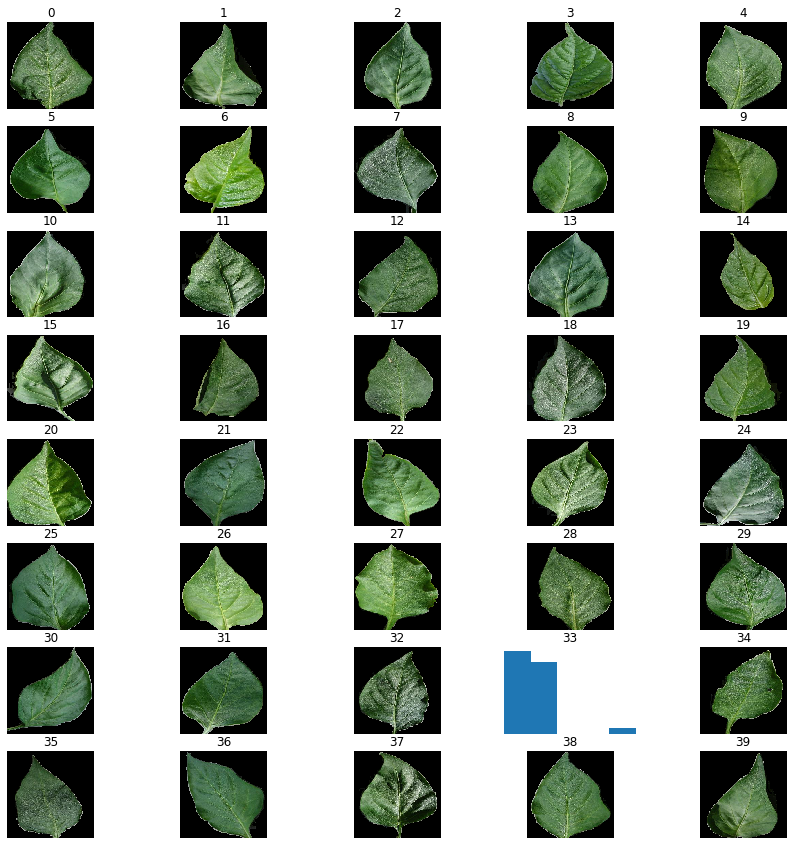

In [9]:
#test batch #1
import os

fileFolder = "../../dataset/PlantVillage/RGB/Pepper__bell___healthy"
fileList = os.listdir(fileFolder)

plt.subplots(8,5,figsize=(15,15))
for item in fileList:
    if os.path.splitext(item)[-1].upper() != ".JPG":
        fileList.remove(item)

# show the first 20 
for i in range(40):
    inputImage=os.path.join(fileFolder,fileList[i])
    img = imageio.imread(inputImage)
    hsv_img = rgb2hsv(img)
    hue_img = hsv_img[:,:,0]

    mask = calcThreshold(hue_img)

    if mask is None:
        plt.subplot(8,5,i+1)
        #print(inputImage)
        n, bins, patches = plt.hist(hue_img.ravel(), bins=5)
        #plt.imshow(hsv_img, cmap = "gray")
        #plt.imshow(img)
        
        plt.title(i)
        plt.axis('off')
        
        print(i)
        print(n)
        print(bins)
        print(np.gradient(n))
        print("******")

        
    else:
        finalImage = np.zeros((img.shape))
        for j in range(3):
            finalImage[:,:,j]= img[:,:,j]* mask

        plt.subplot(8,5,i+1)
        plt.imshow(finalImage.astype(int))
        plt.title(i)
        plt.axis('off')


[3.3986e+04 2.9396e+04 0.0000e+00 4.0000e+00 2.1500e+03]
[0.         0.19871795 0.3974359  0.59615385 0.79487179 0.99358974]
[ -4590. -16993. -14696.   1075.   2146.]
0.16075846354166667


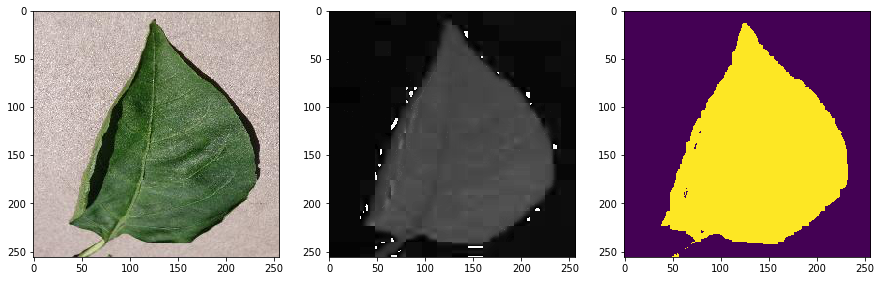

In [10]:
#debugging a specific image
a = os.path.join(fileFolder,fileList[16])
plt.subplots(1,3,figsize=(15,8))
test = imageio.imread(a)
hueI = rgb2hsv(test)[:,:,0]
#mask = calcThreshold(hueI)
plt.subplot(1,3,1)
plt.imshow(test)

plt.subplot(1,3,2)
#n, bins, patches = plt.hist(hueI.ravel(), bins=5)
plt.imshow(hueI, cmap = 'gray')

print(n)
print(bins)
print(np.gradient(n))
highThresh = filters.threshold_otsu(hueI)
print(highThresh)
plt.subplot(1,3,3)

binary2 = np.where(hueI > 0.19871795, 255, 0)
binary3 = np.where(hueI < 0.3974359, 255, 0)
binary4 = binary2&binary3

plt.imshow(binary4)

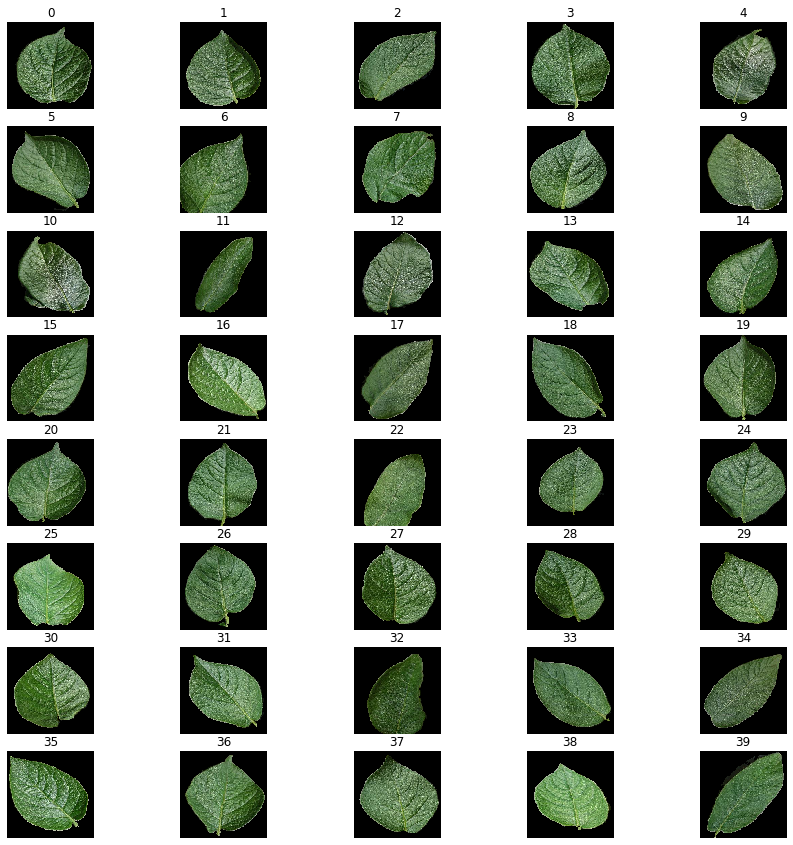

In [15]:
#test batch 2
import os

fileFolder = "../../dataset/PlantVillage/RGB/Potato___healthy"
fileList = os.listdir(fileFolder)

plt.subplots(8,5,figsize=(15,15))
for item in fileList:
    if os.path.splitext(item)[-1].upper() != ".JPG":
        fileList.remove(item)

# show the first 20 
for i in range(40):
    inputImage=os.path.join(fileFolder,fileList[i])
    img = imageio.imread(inputImage)
    hsv_img = rgb2hsv(img)
    hue_img = hsv_img[:,:,0]

    mask = calcThreshold(hue_img)

    if mask is None:
        plt.subplot(8,5,i+1)
        #print(inputImage)
        n, bins, patches = plt.hist(hue_img.ravel(), bins=5)
        #plt.imshow(hsv_img, cmap = "gray")
        #plt.imshow(img)
        
        plt.title(i)
        plt.axis('off')
        
        print(i)
        print(n)
        print(bins)
        print(np.gradient(n))
        print("******")

        
    else:
        finalImage = np.zeros((img.shape))
        for j in range(3):
            finalImage[:,:,j]= img[:,:,j]* mask

        plt.subplot(8,5,i+1)
        plt.imshow(finalImage.astype(int))
        plt.title(i)
        plt.axis('off')
